## Задание 1. Загрузка данных
Изучить представленный набор данных на основе описания его столбцов, загрузить его и оставить 8 столбцов для дальнейшего изучения: surgery?, Age, rectal temperature, pulse, respiratory rate, temperature of extremities, pain, outcome.

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
column = ['surgery?','age','hospital number','rectal temperature','pulse','respiratory rate','temperature of extremities',
               'peripheral pulse','mucous membranes','capillary refill time','pain','peristalsis','abdominal distension',
               'nasogastric tube','nasogastric reflux','nasogastric reflux PH','rectal examination','abdomen',
                'packed cell volume','total protein','abdominocentesis appearance','abdomcentesis total protein',
               'outcome','surgical lesion?','site of lesion','type of lesion','subtype of lesion','cp_data']

In [12]:
df_horse = pd.read_csv('horse_data.csv', header = None, names = column, na_values  = '?')
df_horse.head()

,surgery?,age,hospital number,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,...,packed cell volume,total protein,abdominocentesis appearance,abdomcentesis total protein,outcome,surgical lesion?,site of lesion,type of lesion,subtype of lesion,cp_data
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,...,45.0,8.4,NaN,NaN,2.0,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2


In [13]:
df_horse = df_horse[['surgery?','age','rectal temperature','pulse','respiratory rate','temperature of extremities','pain',
                    'outcome']]
df_horse.head()

,surgery?,age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,2.0,1,38.5,66.0,28.0,3.0,5.0,2.0
1,1.0,1,39.2,88.0,20.0,NaN,3.0,3.0
2,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
3,1.0,9,39.1,164.0,84.0,4.0,2.0,2.0
4,2.0,1,37.3,104.0,35.0,NaN,NaN,2.0


## Задание 2. Первичное изучение данных
Проанализировать значения по столбцам, рассчитать базовые статистики, найти выбросы.

In [14]:
df_horse.info()#Анализ данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery?                    299 non-null    float64
 1   age                         300 non-null    int64  
 2   rectal temperature          240 non-null    float64
 3   pulse                       276 non-null    float64
 4   respiratory rate            242 non-null    float64
 5   temperature of extremities  244 non-null    float64
 6   pain                        245 non-null    float64
 7   outcome                     299 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 18.9 KB


In [20]:
#Выберем только непрерывные переменные для подсчета основных статистики для метрик. Так же найдём выбросы в этих метриках

In [21]:
df_stat_before = df_horse[['rectal temperature', 'pulse', 'respiratory rate']].describe()
df_stat_before

,rectal temperature,pulse,respiratory rate
count,240.000000,276.000000,242.000000
mean,38.167917,71.913043,30.417355
std,0.732289,28.630557,17.642231
min,35.400000,30.000000,8.000000
25%,37.800000,48.000000,18.500000
50%,38.200000,64.000000,24.500000
75%,38.500000,88.000000,36.000000
max,40.800000,184.000000,96.000000


In [22]:
#Моды для категориальных переменных

In [24]:
df_mode_before = df_horse[['surgery?', 'age', 'temperature of extremities', 'pain', 'outcome']].mode()
df_mode_before

,surgery?,age,temperature of extremities,pain,outcome
0,1.0,1,3.0,3.0,1.0


In [28]:
outliers = {} #выбросы
for column, info in df_stat_before.items():
    iqr = info['75%'] - info['25%']
    lower_whisker = info['25%'] - iqr * 1.5
    upper_whisker = info['75%'] + iqr * 1.5
    outliers[column] = df_horse[(df_horse[column] > upper_whisker) | (df_horse[column] < lower_whisker)]
outliers['rectal temperature']

,surgery?,age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
20,1.0,1,39.9,72.0,60.0,1.0,5.0,1.0
44,1.0,1,35.4,140.0,24.0,3.0,4.0,3.0
54,2.0,1,40.3,114.0,36.0,3.0,2.0,3.0
75,1.0,9,39.7,100.0,NaN,3.0,2.0,3.0
80,1.0,1,36.4,98.0,35.0,3.0,4.0,2.0
91,2.0,1,40.3,114.0,36.0,3.0,2.0,2.0
99,2.0,1,39.6,108.0,51.0,3.0,2.0,1.0
118,1.0,1,36.5,78.0,30.0,1.0,5.0,1.0
141,2.0,1,36.0,42.0,30.0,NaN,NaN,2.0
238,2.0,1,36.1,88.0,NaN,3.0,3.0,3.0


In [29]:
outliers['pulse']

,surgery?,age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
3,1.0,9,39.1,164.0,84.0,4.0,2.0,2.0
41,2.0,9,39.0,150.0,72.0,NaN,NaN,1.0
55,1.0,9,38.6,160.0,20.0,3.0,3.0,2.0
255,1.0,9,38.8,184.0,84.0,1.0,4.0,2.0
275,1.0,9,38.8,150.0,50.0,1.0,5.0,2.0


<AxesSubplot:xlabel='age', ylabel='pulse'>

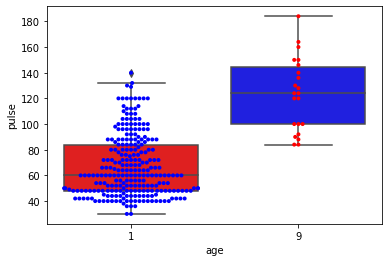

In [32]:
# sns.set_theme(style = 'white')
sns.swarmplot(data=df_horse, x='age', y='pulse', size=4, palette=['blue', 'red'])
sns.boxplot(data=df_horse, x='age', y='pulse',palette=['red', 'blue'])

In [33]:
outliers['respiratory rate']

,surgery?,age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
3,1.0,9,39.1,164.0,84.0,4.0,2.0,2.0
39,1.0,9,39.2,146.0,96.0,NaN,NaN,2.0
41,2.0,9,39.0,150.0,72.0,NaN,NaN,1.0
82,1.0,9,38.1,100.0,80.0,3.0,3.0,1.0
84,1.0,1,37.8,60.0,80.0,1.0,2.0,1.0
103,1.0,9,38.0,140.0,68.0,1.0,3.0,1.0
106,1.0,1,38.3,52.0,96.0,NaN,NaN,1.0
120,1.0,1,39.4,54.0,66.0,1.0,2.0,1.0
125,1.0,1,38.0,42.0,68.0,4.0,3.0,1.0
186,1.0,1,39.3,64.0,90.0,2.0,NaN,1.0


## Задание 3. Работа с пропусками
Рассчитать количество пропусков для всех выбранных столбцов. Принять и обосновать решение о методе заполнения пропусков по каждому столбцу на основе рассчитанных статистик и возможной взаимосвязи значений в них. Сформировать датафрейм, в котором пропуски будут отсутствовать.

In [43]:
#Для того, чтобы узнать, какие столбцы наиболее тесно взаимосвязаны друг с другом, рассчитаем корреляцию Спирмена между переменными.

In [44]:
df_horse[['surgery?','age','pain','outcome']] = (df_horse[['surgery?','age','pain','outcome']].fillna('-999').astype(float)
                                                      .replace(-999,np.nan))
df_horse.head()

,surgery?,age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,2.0,1.0,38.5,66.0,28.0,3.0,5.0,2.0
1,1.0,1.0,39.2,88.0,20.0,NaN,3.0,3.0
2,2.0,1.0,38.3,40.0,24.0,1.0,3.0,1.0
3,1.0,9.0,39.1,164.0,84.0,4.0,2.0,2.0
4,2.0,1.0,37.3,104.0,35.0,NaN,NaN,2.0


In [45]:
df_horse.corr(method = 'spearman')


,surgery?,age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
surgery?,1.000000,-0.088408,0.043568,-0.189621,-0.153539,-0.125377,-0.315774,-0.140369
age,-0.088408,1.000000,0.231712,0.412960,0.320345,-0.054781,0.034668,0.023401
rectal temperature,0.043568,0.231712,1.000000,0.232668,0.230793,0.096336,-0.095274,-0.069372
pulse,-0.189621,0.412960,0.232668,1.000000,0.465486,0.373449,0.352000,0.395591
respiratory rate,-0.153539,0.320345,0.230793,0.465486,1.000000,0.157131,0.194048,0.132025
temperature of extremities,-0.125377,-0.054781,0.096336,0.373449,0.157131,1.000000,0.271812,0.369596
pain,-0.315774,0.034668,-0.095274,0.352000,0.194048,0.271812,1.000000,0.338009
outcome,-0.140369,0.023401,-0.069372,0.395591,0.132025,0.369596,0.338009,1.000000


In [46]:
df_horse_final = df_horse
df_horse_final['surgery?'].fillna(1, inplace = True)
df_horse_final['outcome'].fillna(1, inplace = True)

In [47]:
df_horse_final['pulse'].fillna(df_horse_final.groupby('age')['pulse'].transform('mean'), inplace=True)

In [48]:
df_horse_final['pulse_group'] = pd.qcut(df_horse_final['pulse'], q = 4)
df_horse_final.head()

,surgery?,age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome,pulse_group
0,2.0,1.0,38.5,66.0,28.0,3.0,5.0,2.0,"(64.0, 88.0]"
1,1.0,1.0,39.2,88.0,20.0,NaN,3.0,3.0,"(64.0, 88.0]"
2,2.0,1.0,38.3,40.0,24.0,1.0,3.0,1.0,"(29.999, 48.0]"
3,1.0,9.0,39.1,164.0,84.0,4.0,2.0,2.0,"(88.0, 184.0]"
4,2.0,1.0,37.3,104.0,35.0,NaN,NaN,2.0,"(88.0, 184.0]"


In [49]:
df_horse_final = df_horse_final.merge(df_horse_final.rename(columns = {'pain': 'pain_sub'}).groupby('pulse_group')['pain_sub']
                                      .apply(lambda x: stats.mode(x)[0][0]), how = 'left', on = 'pulse_group')
df_horse_final = df_horse_final.merge(df_horse_final.rename(columns = {'temperature of extremities': 'toe_sub'})
                                      .groupby('outcome')['toe_sub']
                                      .apply(lambda x: stats.mode(x)[0][0]), how = 'left', on = 'outcome')

In [50]:
(df_horse_final['rectal temperature']
 .fillna(df_horse_final.groupby('pulse_group')['rectal temperature'].transform('mean'), inplace=True))

(df_horse_final['respiratory rate']
 .fillna(df_horse_final.groupby('pulse_group')['respiratory rate'].transform('mean'), inplace=True))

df_horse_final['pain'].fillna(df_horse_final['pain_sub'], inplace = True)
df_horse_final['temperature of extremities'].fillna(df_horse_final['toe_sub'], inplace = True)

In [51]:
# Отбрасываем вспомогательные столбцы и проверяем, что пропущенных значений в датасете не осталось
df_horse_final.drop(labels = ['pain_sub','toe_sub', 'pulse_group'], axis = 1, inplace = True)
df_horse_final.isna().sum()

surgery?                      0
age                           0
rectal temperature            0
pulse                         0
respiratory rate              0
temperature of extremities    0
pain                          0
outcome                       0
dtype: int64

In [52]:
df_horse_final

,surgery?,age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,2.0,1.0,38.500000,66.0,28.0,3.0,5.0,2.0
1,1.0,1.0,39.200000,88.0,20.0,3.0,3.0,3.0
2,2.0,1.0,38.300000,40.0,24.0,1.0,3.0,1.0
3,1.0,9.0,39.100000,164.0,84.0,4.0,2.0,2.0
4,2.0,1.0,37.300000,104.0,35.0,3.0,2.0,2.0
...,...,...,...,...,...,...,...,...
295,1.0,1.0,38.398039,120.0,70.0,4.0,2.0,3.0
296,2.0,1.0,37.200000,72.0,24.0,3.0,4.0,3.0
297,1.0,1.0,37.500000,72.0,30.0,4.0,4.0,2.0
298,1.0,1.0,36.500000,100.0,24.0,3.0,3.0,1.0
